In [ ]:
!kaggle datasets download -d bobaaayoung/trafficvolumedatacsv

Dataset URL: https://www.kaggle.com/datasets/bobaaayoung/trafficvolumedatacsv
License(s): unknown
  0% 0.00/532k [00:00<?, ?B/s]
100% 532k/532k [00:00<00:00, 80.3MB/s]


In [ ]:
!unzip trafficvolumedatacsv.zip

Archive:  trafficvolumedatacsv.zip
  inflating: TrafficVolumeData.csv   


In [ ]:
!pip install neuralprophet
!pip install torch torchvision torchaudio
!pip install --upgrade neuralprophet
!pip install neuralprophet[live]
!pip install prophet
!pip install --upgrade numpy
!pip install neuralprophet==0.2.1

ERROR: Could not find a version that satisfies the requirement neuralprophet==0.2.1 (from versions: 0.2.5, 0.2.6, 0.2.7, 0.2.8, 0.3.0, 0.3.1, 0.3.2, 0.4.1, 0.4.2, 0.5.0rc1, 0.5.0rc2, 0.5.0, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.6.0rc1, 0.6.0, 0.6.1, 0.6.2, 0.7.0, 0.8.0, 1.0.0rc1, 1.0.0rc2, 1.0.0rc3, 1.0.0rc4, 1.0.0rc5, 1.0.0rc6, 1.0.0rc7, 1.0.0rc8, 1.0.0rc9)
ERROR: No matching distribution found for neuralprophet==0.2.1


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from prophet import Prophet
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import state_ops
from tensorflow.python.framework import ops
from tensorflow.python.training import optimizer
import tensorflow as tf


In [ ]:
df=pd.read_csv('TrafficVolumeData.csv')
df

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,2017-05-17 21:00:00,NaN,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,2017-05-17 22:00:00,NaN,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,2017-05-17 22:00:00,NaN,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,2017-05-17 23:00:00,NaN,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328


In [ ]:
df.tail()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
33745,2017-05-17 21:00:00,NaN,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,2017-05-17 22:00:00,NaN,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,2017-05-17 22:00:00,NaN,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,2017-05-17 23:00:00,NaN,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
33749,2017-05-17 23:00:00,NaN,140,63,1,27,8,8,285.75,0.0,0.0,90,Mist,mist,1328


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
# Apply the timestamp() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            33750 non-null  datetime64[ns]
 1   is_holiday           43 non-null     object        
 2   air_pollution_index  33750 non-null  int64         
 3   humidity             33750 non-null  int64         
 4   wind_speed           33750 non-null  int64         
 5   wind_direction       33750 non-null  int64         
 6   visibility_in_miles  33750 non-null  int64         
 7   dew_point            33750 non-null  int64         
 8   temperature          33750 non-null  float64       
 9   rain_p_h             33750 non-null  float64       
 10  snow_p_h             33750 non-null  float64       
 11  clouds_all           33750 non-null  int64         
 12  weather_type         33750 non-null  object        
 13  weather_description  33750 non-

In [ ]:
start_date = pd.to_datetime('2012-10-02')
end_date = pd.to_datetime('2013-10-02')

# Filter the DataFrame
filtered_df = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]

In [ ]:
filtered_df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
filtered_df.tail()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
9216,2013-09-30 20:00:00,NaN,184,97,1,150,5,5,294.08,0.0,0.0,0,Clear,Sky is Clear,2741
9217,2013-09-30 21:00:00,NaN,289,77,1,150,7,7,293.39,0.0,0.0,0,Clear,Sky is Clear,2232
9218,2013-09-30 23:00:00,NaN,103,88,2,150,1,1,292.76,0.0,0.0,0,Clear,Sky is Clear,1848
9219,2013-10-01 21:00:00,NaN,214,77,2,100,4,4,285.52,0.0,0.0,0,Clear,Sky is Clear,2670
9220,2013-10-01 23:00:00,NaN,65,93,3,140,9,9,282.93,0.0,0.0,0,Clear,Sky is Clear,1299


In [ ]:
df=filtered_df.drop(['weather_description','weather_type','is_holiday'],axis='columns')
df

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,5545
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,4516
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,90,4767
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,90,5026
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,75,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
9216,2013-09-30 20:00:00,184,97,1,150,5,5,294.08,0.0,0.0,0,2741
9217,2013-09-30 21:00:00,289,77,1,150,7,7,293.39,0.0,0.0,0,2232
9218,2013-09-30 23:00:00,103,88,2,150,1,1,292.76,0.0,0.0,0,1848
9219,2013-10-01 21:00:00,214,77,2,100,4,4,285.52,0.0,0.0,0,2670


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9221 entries, 0 to 9220
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            9221 non-null   datetime64[ns]
 1   air_pollution_index  9221 non-null   int64         
 2   humidity             9221 non-null   int64         
 3   wind_speed           9221 non-null   int64         
 4   wind_direction       9221 non-null   int64         
 5   visibility_in_miles  9221 non-null   int64         
 6   dew_point            9221 non-null   int64         
 7   temperature          9221 non-null   float64       
 8   rain_p_h             9221 non-null   float64       
 9   snow_p_h             9221 non-null   float64       
 10  clouds_all           9221 non-null   int64         
 11  traffic_volume       9221 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 936.5 KB


In [ ]:
df = df.rename(columns={'date_time':'ds','traffic_volume':'y'})
df

,ds,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,y
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,5545
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,4516
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,90,4767
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,90,5026
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,75,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
9216,2013-09-30 20:00:00,184,97,1,150,5,5,294.08,0.0,0.0,0,2741
9217,2013-09-30 21:00:00,289,77,1,150,7,7,293.39,0.0,0.0,0,2232
9218,2013-09-30 23:00:00,103,88,2,150,1,1,292.76,0.0,0.0,0,1848
9219,2013-10-01 21:00:00,214,77,2,100,4,4,285.52,0.0,0.0,0,2670


In [ ]:
df = df.drop_duplicates(subset="ds")
df

,ds,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,y
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,5545
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,4516
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,90,4767
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,90,5026
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,75,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
9216,2013-09-30 20:00:00,184,97,1,150,5,5,294.08,0.0,0.0,0,2741
9217,2013-09-30 21:00:00,289,77,1,150,7,7,293.39,0.0,0.0,0,2232
9218,2013-09-30 23:00:00,103,88,2,150,1,1,292.76,0.0,0.0,0,1848
9219,2013-10-01 21:00:00,214,77,2,100,4,4,285.52,0.0,0.0,0,2670


In [ ]:
data=df.dropna()
data

,ds,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,y
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,5545
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,4516
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,90,4767
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,90,5026
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,75,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
9216,2013-09-30 20:00:00,184,97,1,150,5,5,294.08,0.0,0.0,0,2741
9217,2013-09-30 21:00:00,289,77,1,150,7,7,293.39,0.0,0.0,0,2232
9218,2013-09-30 23:00:00,103,88,2,150,1,1,292.76,0.0,0.0,0,1848
9219,2013-10-01 21:00:00,214,77,2,100,4,4,285.52,0.0,0.0,0,2670


In [ ]:
data.columns

Index(['ds', 'air_pollution_index', 'humidity', 'wind_speed', 'wind_direction',
       'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h',
       'snow_p_h', 'clouds_all', 'y'],
      dtype='object')

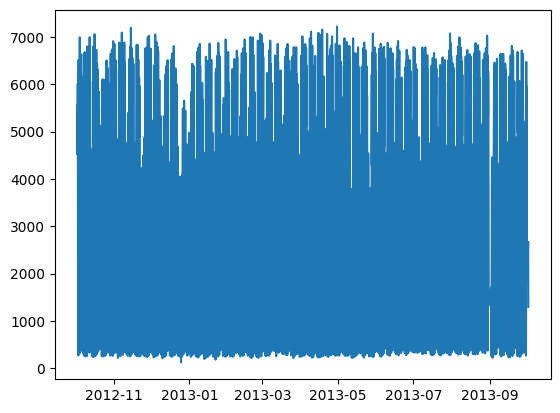

In [ ]:
plt.plot(data['ds'],data['y'])

In [ ]:
X=data.drop(['y','ds'],axis='columns')
X

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
0,121,89,2,329,1,1,288.28,0.0,0.0,40
1,178,67,3,330,1,1,289.36,0.0,0.0,75
2,113,66,3,329,2,2,289.58,0.0,0.0,90
3,20,66,3,329,5,5,290.13,0.0,0.0,90
4,281,65,3,329,7,7,291.14,0.0,0.0,75
...,...,...,...,...,...,...,...,...,...,...
9216,184,97,1,150,5,5,294.08,0.0,0.0,0
9217,289,77,1,150,7,7,293.39,0.0,0.0,0
9218,103,88,2,150,1,1,292.76,0.0,0.0,0
9219,214,77,2,100,4,4,285.52,0.0,0.0,0


In [ ]:
Y=data['y']
Y

0       5545
1       4516
2       4767
3       5026
4       4918
        ... 
9216    2741
9217    2232
9218    1848
9219    2670
9220    1299
Name: y, Length: 7773, dtype: int64

In [ ]:
Y

0       5545
1       4516
2       4767
3       5026
4       4918
        ... 
9216    2741
9217    2232
9218    1848
9219    2670
9220    1299
Name: y, Length: 7773, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
y_train

7171    5913
3116     346
4730    5082
8148     472
4550    4869
        ... 
6420    3637
6616    4702
1027    2471
9047    1153
8667    4765
Name: y, Length: 6218, dtype: int64

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Assume X and Y are your datasets
X = X
Y = X

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.transform(Y)

# Build a simple autoencoder model
input_size = X_scaled.shape[1]  # Number of features
encoding_dim = 3  # Adjust the encoding dimension based on your requirements

initializer = tf.keras.initializers.GlorotUniform()

input_data = tf.keras.layers.Input(shape=(input_size,), dtype=tf.float32)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu', kernel_initializer=initializer)(input_data)
decoded = tf.keras.layers.Dense(input_size, activation='relu', kernel_initializer=initializer)(encoded)

autoencoder = tf.keras.models.Model(input_data, decoded)

# Define loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Define metrics
train_acc_metric = tf.keras.metrics.MeanSquaredError()

# Define the optimizers
adam_optimizer = tf.keras.optimizers.Adam()
sgd_momentum_optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Custom training step function
def train_step(x, y):
    # Function to apply an optimizer and calculate the loss
    def apply_optimizer(optimizer):
        with tf.GradientTape() as tape:
            logits = autoencoder(x, training=True)
            loss_value = loss_fn(y, logits)
        grads = tape.gradient(loss_value, autoencoder.trainable_weights)
        optimizer.apply_gradients(zip(grads, autoencoder.trainable_weights))
        return loss_value, logits

    # Calculate loss using Adam optimizer
    adam_loss_value, adam_logits = apply_optimizer(adam_optimizer)

    # Calculate loss using SGD optimizer with momentum
    sgd_momentum_loss_value, sgd_momentum_logits = apply_optimizer(sgd_momentum_optimizer)

    # Select the optimizer that produces the lower loss
    if sgd_momentum_loss_value < adam_loss_value:
        selected_loss_value = sgd_momentum_loss_value
        selected_logits = sgd_momentum_logits
    else:
        selected_loss_value = adam_loss_value
        selected_logits = adam_logits

    # Calculate training metric on the model for the batches of the dataset
    train_acc_metric.update_state(y, selected_logits)

    return selected_loss_value

# Training parameters
epochs = 50
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((X_scaled, Y_scaled)).shuffle(buffer_size=1024).batch(batch_size)
loss = []

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(dataset):
        loss_value = train_step(x_batch, y_batch)
        loss.append(loss_value.numpy())
        if step % 100 == 0:
            print(f"Step {step}: loss = {loss_value.numpy()}")

    # Reset metrics at the end of each epoch
    train_acc_metric.reset_states()

# Extract deep features from the encoder part of the autoencoder
encoder = tf.keras.models.Model(input_data, encoded)
deep_features = encoder.predict(X_scaled)

print("Training completed and deep features extracted.")
print(deep_features)


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning:

The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.



Epoch 1/50
Step 0: loss = 0.22103850543498993
Step 100: loss = 0.14139437675476074
Step 200: loss = 0.09625284373760223
Epoch 2/50
Step 0: loss = 0.10816191136837006
Step 100: loss = 0.12326549738645554
Step 200: loss = 0.032404497265815735
Epoch 3/50
Step 0: loss = 0.07341533154249191
Step 100: loss = 0.06061068922281265
Step 200: loss = 0.046634845435619354
Epoch 4/50
Step 0: loss = 0.07990657538175583
Step 100: loss = 0.05684242025017738
Step 200: loss = 0.03438901901245117
Epoch 5/50
Step 0: loss = 0.06324189901351929
Step 100: loss = 0.05998494103550911
Step 200: loss = 0.033713456243276596
Epoch 6/50
Step 0: loss = 0.07690036296844482
Step 100: loss = 0.06812712550163269
Step 200: loss = 0.03840583562850952
Epoch 7/50
Step 0: loss = 0.06722888350486755
Step 100: loss = 0.05118285119533539
Step 200: loss = 0.03391462564468384
Epoch 8/50
Step 0: loss = 0.05915054678916931
Step 100: loss = 0.05456087365746498
Step 200: loss = 0.031243398785591125
Epoch 9/50
Step 0: loss = 0.05351310

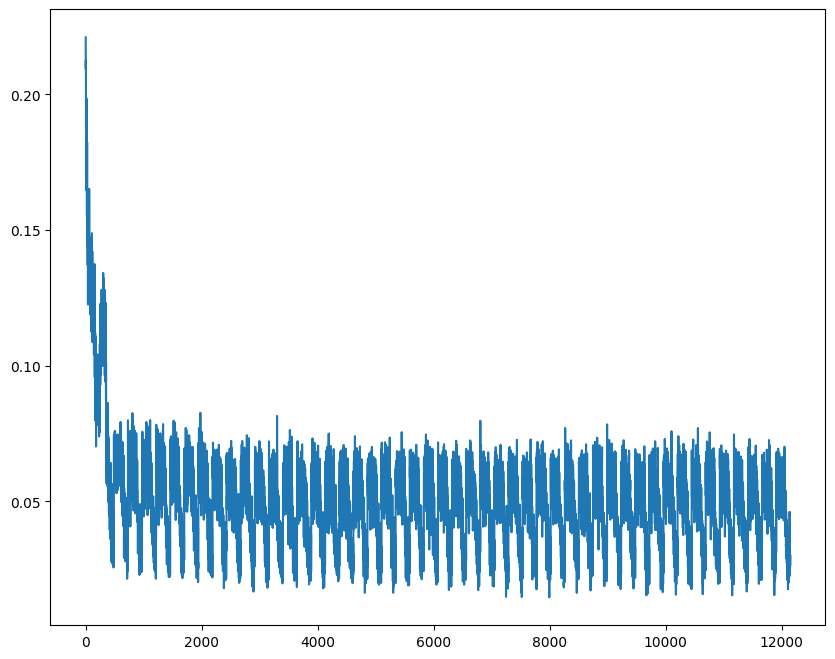

In [ ]:
plt.plot(loss)

In [ ]:
y=y_train

In [ ]:
# Reset index for both data['ds'] and deep_features DataFrames
deep_features=pd.DataFrame(deep_features)
data_ds_reset = data['ds'].reset_index(drop=True)
deep_features_reset = deep_features.reset_index(drop=True)

In [ ]:
DATY_F=pd.concat([data_ds_reset,deep_features_reset,y],axis=1)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df=DATY_F
df.head()

,ds,0,1,2,y
0,2012-10-02 09:00:00,0.633165,0.179964,0.161599,NaN
1,2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2,2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
3,2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
4,2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0


In [ ]:
df.shape

(8852, 5)

In [ ]:
df.dropna()

,ds,0,1,2,y
1,2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2,2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
3,2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
4,2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0
5,2012-10-02 14:00:00,0.696161,0.468262,0.338839,5181.0
...,...,...,...,...,...
7768,2013-09-30 20:00:00,0.270110,0.323378,0.380288,3041.0
7769,2013-09-30 21:00:00,0.212310,0.268912,0.604528,2371.0
7770,2013-09-30 23:00:00,0.342639,0.269600,0.079284,1917.0
7771,2013-10-01 21:00:00,0.186704,0.264511,0.343749,3050.0


In [ ]:
df.shape

(8852, 5)

In [ ]:
df['ds']=pd.to_datetime(df['ds'])
df

,ds,0,1,2,y
0,2012-10-02 09:00:00,0.633165,0.179964,0.161599,NaN
1,2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2,2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
3,2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
4,2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0
...,...,...,...,...,...
8346,NaT,NaN,NaN,NaN,4342.0
9019,NaT,NaN,NaN,NaN,5653.0
8888,NaT,NaN,NaN,NaN,4678.0
9047,NaT,NaN,NaN,NaN,1153.0


In [ ]:
df.head()

,ds,0,1,2,y
0,2012-10-02 09:00:00,0.633165,0.179964,0.161599,NaN
1,2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2,2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
3,2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
4,2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 0 to 8667
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7773 non-null   datetime64[ns]
 1   0       7773 non-null   float32       
 2   1       7773 non-null   float32       
 3   2       7773 non-null   float32       
 4   y       6218 non-null   float64       
dtypes: datetime64[ns](1), float32(3), float64(1)
memory usage: 311.2 KB


In [ ]:
df

,ds,0,1,2,y
0,2012-10-02 09:00:00,0.633165,0.179964,0.161599,NaN
1,2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2,2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
3,2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
4,2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0
...,...,...,...,...,...
8346,NaT,NaN,NaN,NaN,4342.0
9019,NaT,NaN,NaN,NaN,5653.0
8888,NaT,NaN,NaN,NaN,4678.0
9047,NaT,NaN,NaN,NaN,1153.0


In [ ]:
df=df.dropna()
df

,ds,0,1,2,y
1,2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2,2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
3,2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
4,2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0
5,2012-10-02 14:00:00,0.696161,0.468262,0.338839,5181.0
...,...,...,...,...,...
7768,2013-09-30 20:00:00,0.270110,0.323378,0.380288,3041.0
7769,2013-09-30 21:00:00,0.212310,0.268912,0.604528,2371.0
7770,2013-09-30 23:00:00,0.342639,0.269600,0.079284,1917.0
7771,2013-10-01 21:00:00,0.186704,0.264511,0.343749,3050.0


In [ ]:
fig = px.line(df, x='ds', y='y', hover_data=df.columns, title='Traffic Volume')

# Update x-axis for day-by-day result
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Show the plot
fig.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

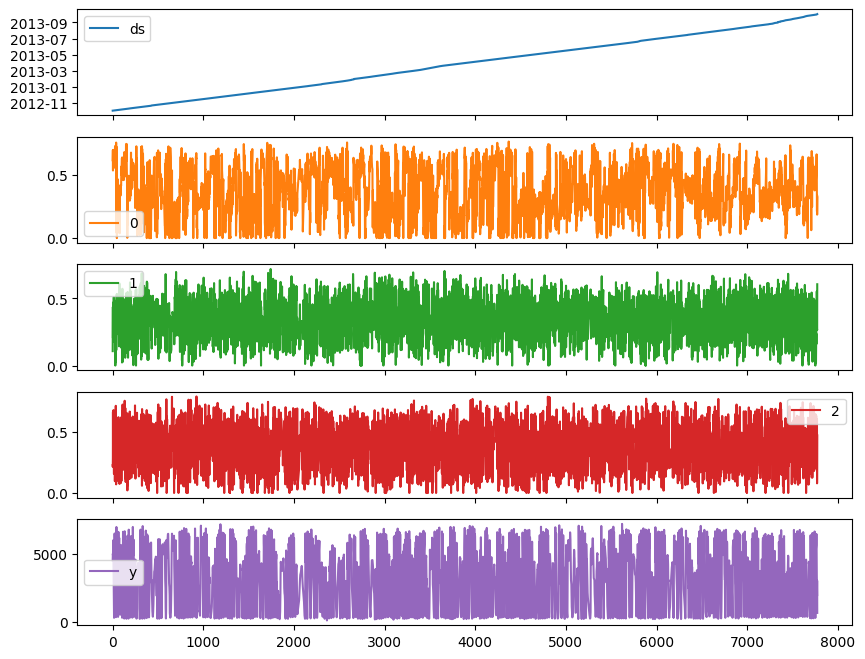

In [ ]:
df.plot(subplots=True)

In [ ]:
ny_df=df
ny_df

,ds,0,1,2,y
1,2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2,2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
3,2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
4,2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0
5,2012-10-02 14:00:00,0.696161,0.468262,0.338839,5181.0
...,...,...,...,...,...
7768,2013-09-30 20:00:00,0.270110,0.323378,0.380288,3041.0
7769,2013-09-30 21:00:00,0.212310,0.268912,0.604528,2371.0
7770,2013-09-30 23:00:00,0.342639,0.269600,0.079284,1917.0
7771,2013-10-01 21:00:00,0.186704,0.264511,0.343749,3050.0


In [ ]:
ny_df=df.set_index('ds')

In [ ]:
ny_df.tail(10)

,0,1,2,y
ds,,,,
2013-09-30 02:00:00,0.577792,0.159367,0.355194,6295.0
2013-09-30 04:00:00,0.598793,0.486164,0.408571,6477.0
2013-09-30 07:00:00,0.666065,0.335981,0.194721,5441.0
2013-09-30 12:00:00,0.586197,0.334165,0.460041,3943.0
2013-09-30 17:00:00,0.500676,0.551830,0.438044,3453.0
2013-09-30 20:00:00,0.270110,0.323378,0.380288,3041.0
2013-09-30 21:00:00,0.212310,0.268912,0.604528,2371.0
2013-09-30 23:00:00,0.342639,0.269600,0.079284,1917.0
2013-10-01 21:00:00,0.186704,0.264511,0.343749,3050.0


In [ ]:
ny_df

,0,1,2,y
ds,,,,
2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0
2012-10-02 14:00:00,0.696161,0.468262,0.338839,5181.0
...,...,...,...,...
2013-09-30 20:00:00,0.270110,0.323378,0.380288,3041.0
2013-09-30 21:00:00,0.212310,0.268912,0.604528,2371.0
2013-09-30 23:00:00,0.342639,0.269600,0.079284,1917.0


In [ ]:
ny_df.resample('D').mean()

,0,1,2,y
ds,,,,
2012-10-02,0.628833,0.303134,0.415285,4249.166667
2012-10-03,0.656163,0.275232,0.338512,3555.357143
2012-10-04,0.417505,0.311944,0.352139,3836.611111
2012-10-05,0.247197,0.396055,0.421419,4450.812500
2012-10-06,0.445896,0.339081,0.313776,3035.071429
...,...,...,...,...
2013-09-27,0.434544,0.297795,0.436317,3924.214286
2013-09-28,0.509684,0.264841,0.434268,3591.944444
2013-09-29,0.476374,0.232639,0.386413,3350.312500


array([<Axes: xlabel='ds'>, <Axes: xlabel='ds'>, <Axes: xlabel='ds'>,
       <Axes: xlabel='ds'>], dtype=object)

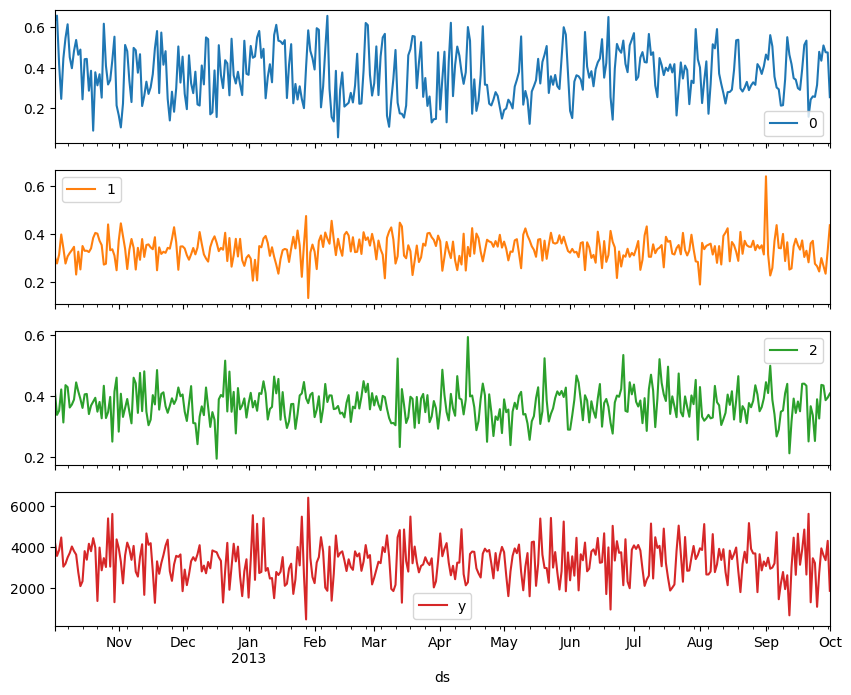

In [ ]:
ny_df.resample('D').mean().plot(subplots=True)

In [ ]:
ny_df_final=ny_df
ny_df_final

,0,1,2,y
ds,,,,
2012-10-02 10:00:00,0.619005,0.107194,0.228283,4516.0
2012-10-02 11:00:00,0.653532,0.219215,0.214418,4767.0
2012-10-02 12:00:00,0.700022,0.435792,0.280732,5026.0
2012-10-02 13:00:00,0.537734,0.203989,0.665445,4918.0
2012-10-02 14:00:00,0.696161,0.468262,0.338839,5181.0
...,...,...,...,...
2013-09-30 20:00:00,0.270110,0.323378,0.380288,3041.0
2013-09-30 21:00:00,0.212310,0.268912,0.604528,2371.0
2013-09-30 23:00:00,0.342639,0.269600,0.079284,1917.0


In [ ]:
ny_df_final=ny_df_final.reset_index()[['ds','y']].rename({'ds':'ds','y':'y'}, axis='columns')

In [ ]:
ny_df_final

,ds,y
0,2012-10-02 10:00:00,4516.0
1,2012-10-02 11:00:00,4767.0
2,2012-10-02 12:00:00,5026.0
3,2012-10-02 13:00:00,4918.0
4,2012-10-02 14:00:00,5181.0
...,...,...
5134,2013-09-30 20:00:00,3041.0
5135,2013-09-30 21:00:00,2371.0
5136,2013-09-30 23:00:00,1917.0
5137,2013-10-01 21:00:00,3050.0


In [ ]:
ny_df_final

,ds,y
0,2012-10-02 10:00:00,4516.0
1,2012-10-02 11:00:00,4767.0
2,2012-10-02 12:00:00,5026.0
3,2012-10-02 13:00:00,4918.0
4,2012-10-02 14:00:00,5181.0
...,...,...
5134,2013-09-30 20:00:00,3041.0
5135,2013-09-30 21:00:00,2371.0
5136,2013-09-30 23:00:00,1917.0
5137,2013-10-01 21:00:00,3050.0


In [ ]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-10-02') & (ny_df_final['ds'] <= '2013-07-01')]
test=ny_df_final[(ny_df_final['ds'] > '2013-07-02')]

In [ ]:
train.shape

(3954, 2)

In [ ]:
test.shape

(1166, 2)

In [ ]:
test

,ds,y
3973,2013-07-02 02:00:00,261.0
3974,2013-07-02 03:00:00,349.0
3975,2013-07-02 04:00:00,795.0
3976,2013-07-02 05:00:00,2764.0
3977,2013-07-02 06:00:00,5952.0
...,...,...
5134,2013-09-30 20:00:00,3041.0
5135,2013-09-30 21:00:00,2371.0
5136,2013-09-30 23:00:00,1917.0
5137,2013-10-01 21:00:00,3050.0


In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpy49h48kt/c74_chn4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy49h48kt/4lmjluih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42480', 'data', 'file=/tmp/tmpy49h48kt/c74_chn4.json', 'init=/tmp/tmpy49h48kt/4lmjluih.json', 'output', 'file=/tmp/tmpy49h48kt/prophet_modelt0_1ic69/prophet_model-20240523170149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m.params

OrderedDict([('lp__', array([[3091.51]])),
             ('k', array([[-0.458075]])),
             ('m', array([[0.674798]])),
             ('delta',
              array([[-3.85214e-08,  7.06464e-09, -2.15565e-08,  2.42416e-08,
                      -1.14430e-08,  2.62006e-08, -7.59752e-09,  2.93808e-08,
                      -6.79257e-09,  1.20042e-08, -6.55042e-08,  4.60727e-09,
                      -1.60031e-08,  2.02882e-08,  2.85401e-08, -7.57135e-10,
                       9.16667e-10, -1.99982e-08,  2.97485e-09,  2.01650e-08,
                      -2.44413e-09,  4.61939e-09,  1.06220e-08,  1.38820e-08,
                      -4.98769e-09]])),
             ('sigma_obs', array([[0.277495]])),
             ('beta',
              array([[ 1.11557e-01, -1.11772e-01, -2.19517e-02,  1.05666e-02,
                       1.85026e-02,  2.14550e-04, -4.00392e-02,  8.98464e-04,
                       1.63110e-02, -1.59970e-02, -1.37573e-02,  1.33185e-02,
                       5.49137e-03,  4

In [ ]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
4053,2013-10-09
4054,2013-10-10
4055,2013-10-11
4056,2013-10-12
4057,2013-10-13


In [ ]:
future

,ds
0,2012-10-02 10:00:00
1,2012-10-02 11:00:00
2,2012-10-02 12:00:00
3,2012-10-02 13:00:00
4,2012-10-02 14:00:00
...,...
4053,2013-10-09 00:00:00
4054,2013-10-10 00:00:00
4055,2013-10-11 00:00:00
4056,2013-10-12 00:00:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4053,2013-10-09,-833.709590,-4953.077594,2993.175458
4054,2013-10-10,-877.956645,-4644.206423,2959.510107
4055,2013-10-11,-1079.982960,-5044.027083,2967.853603
4056,2013-10-12,-1263.548149,-5420.182955,2659.073476
4057,2013-10-13,-1230.904977,-5088.194769,2797.120182


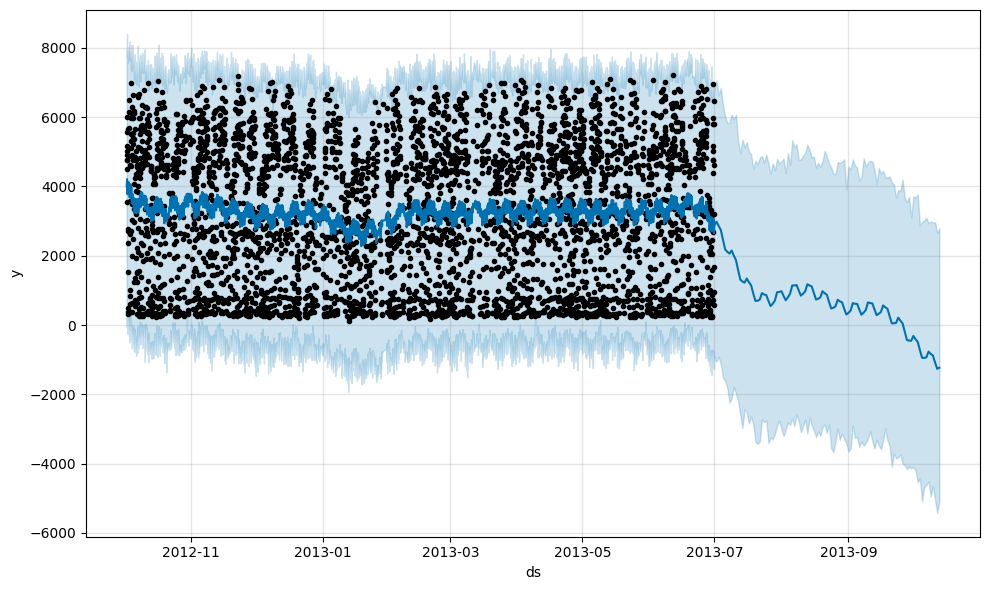

In [ ]:
fig1 = m.plot(forecast)

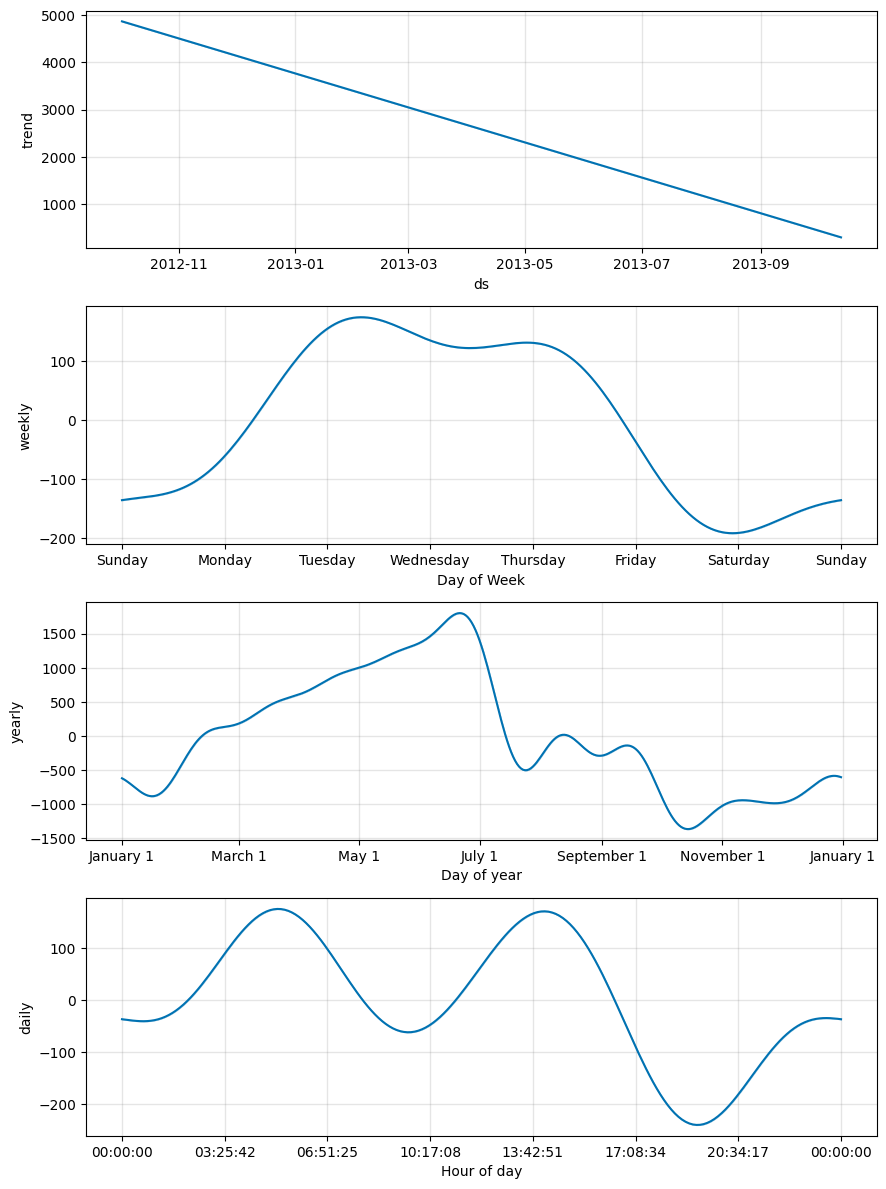

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '100 days', horizon = '100 days')
df_p = performance_metrics(cv_results)
df_p

INFO:prophet:Making 2 forecasts with cutoffs between 2013-02-01 00:00:00 and 2013-03-23 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpy49h48kt/61z1q5eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy49h48kt/ykkujjr9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74780', 'data', 'file=/tmp/tmpy49h48kt/61z1q5eb.json', 'init=/tmp/tmpy49h48kt/ykkujjr9.json', 'output', 'file=/tmp/tmpy49h48kt/prophet_model796pezvz/prophet_model-20240523170221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:02:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy49h48kt/1d_gptjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy49h48kt/i8wtnffg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days 13:00:00,4.311566e+06,2076.430976,1775.316709,1.782419,0.479432,0.680974,0.966997
1,10 days 14:00:00,4.347565e+06,2085.081638,1782.655798,1.780885,0.479432,0.681914,0.966997
2,10 days 15:00:00,4.364772e+06,2089.203678,1786.982710,1.778660,0.478503,0.681553,0.966997
3,10 days 16:00:00,4.424177e+06,2103.372713,1796.490620,1.777686,0.478503,0.682988,0.963696
4,10 days 17:00:00,4.426574e+06,2103.942569,1798.212746,1.774526,0.475388,0.682431,0.963696
...,...,...,...,...,...,...,...,...
1870,99 days 20:00:00,1.734659e+07,4164.924132,3503.057707,1.798335,1.325961,1.409977,0.603960
1871,99 days 21:00:00,1.731360e+07,4160.961611,3499.823984,1.800018,1.327247,1.409977,0.603960
1872,99 days 22:00:00,1.714119e+07,4140.192374,3474.004995,1.807282,1.330115,1.404146,0.610561
1873,99 days 23:00:00,1.699788e+07,4122.848926,3452.691596,1.824079,1.336041,1.400020,0.617162


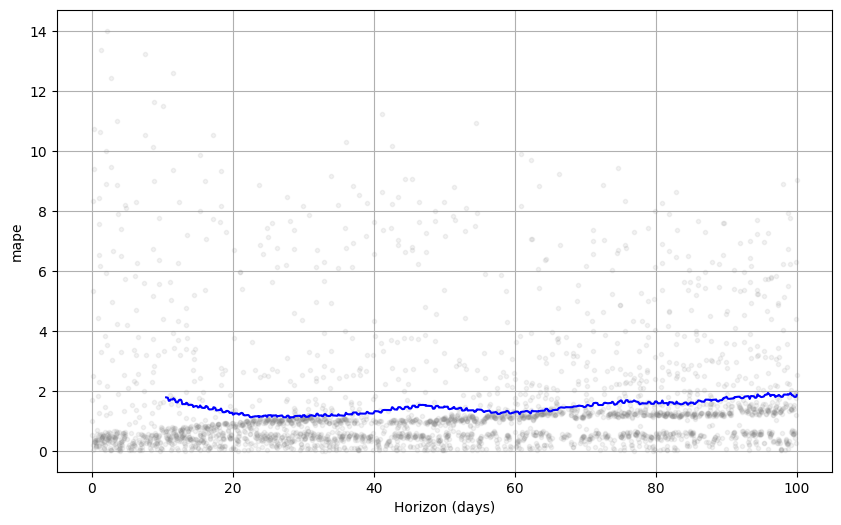

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

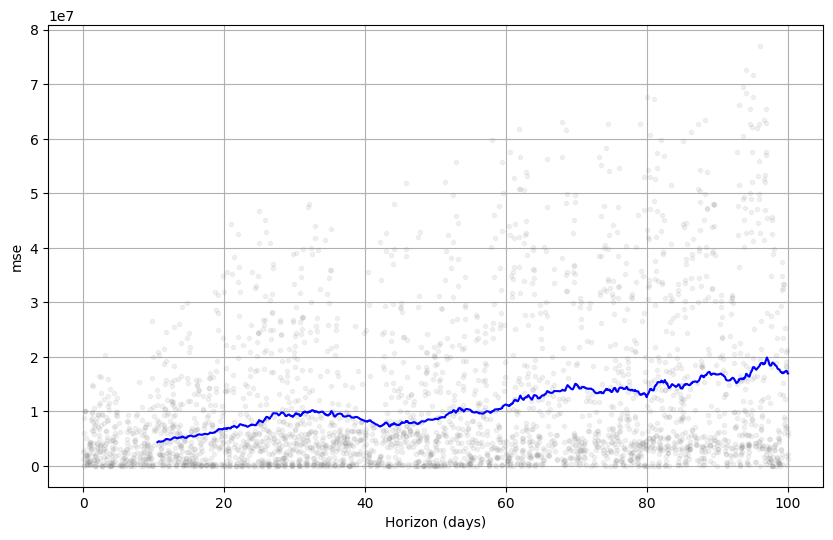

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mse')